In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler as SS
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression as LR, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.externals import joblib

warnings.filterwarnings('ignore')

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
data = pd.read_csv('datasets/Project_7_Baseball.csv')

In [3]:
data

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [4]:
data.shape

(30, 17)

In [5]:
data.W

0      95
1      83
2      81
3      76
4      74
5      93
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
W      30 non-null int64
R      30 non-null int64
AB     30 non-null int64
H      30 non-null int64
2B     30 non-null int64
3B     30 non-null int64
HR     30 non-null int64
BB     30 non-null int64
SO     30 non-null int64
SB     30 non-null int64
RA     30 non-null int64
ER     30 non-null int64
ERA    30 non-null float64
CG     30 non-null int64
SHO    30 non-null int64
SV     30 non-null int64
E      30 non-null int64
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [7]:
data.nunique()

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts,Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors



-- Output: Number of predicted wins (W)

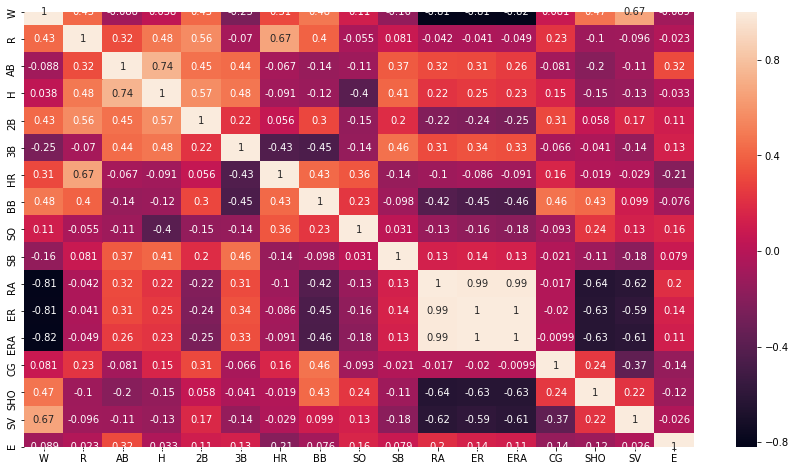

In [8]:
#Checking for the correlation
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

From the observation, W is higly correlated with SV, E, SHO

H is highly correlated with AB

W is moderately correlated with other columns.

In [9]:
#Checking for dataset description

data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


From the above table we can see, 75% and max having huge difference for R, H, AB, SO, SB

W         AxesSubplot(0.125,0.657941;0.0945122x0.222059)
R      AxesSubplot(0.238415,0.657941;0.0945122x0.222059)
AB     AxesSubplot(0.351829,0.657941;0.0945122x0.222059)
H      AxesSubplot(0.465244,0.657941;0.0945122x0.222059)
2B     AxesSubplot(0.578659,0.657941;0.0945122x0.222059)
3B     AxesSubplot(0.692073,0.657941;0.0945122x0.222059)
HR     AxesSubplot(0.805488,0.657941;0.0945122x0.222059)
BB        AxesSubplot(0.125,0.391471;0.0945122x0.222059)
SO     AxesSubplot(0.238415,0.391471;0.0945122x0.222059)
SB     AxesSubplot(0.351829,0.391471;0.0945122x0.222059)
RA     AxesSubplot(0.465244,0.391471;0.0945122x0.222059)
ER     AxesSubplot(0.578659,0.391471;0.0945122x0.222059)
ERA    AxesSubplot(0.692073,0.391471;0.0945122x0.222059)
CG     AxesSubplot(0.805488,0.391471;0.0945122x0.222059)
SHO          AxesSubplot(0.125,0.125;0.0945122x0.222059)
SV        AxesSubplot(0.238415,0.125;0.0945122x0.222059)
E         AxesSubplot(0.351829,0.125;0.0945122x0.222059)
dtype: object

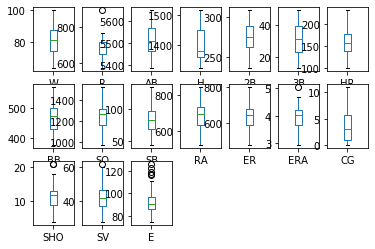

In [10]:
#Checkign for the outliers
#displaying box plot for outliers
data.plot(kind='box',subplots=True,layout=(3,7))

Outliers are present in E, SV, SHO, R

In [11]:
data.shape

(30, 17)

In [12]:
#removing outliers present
from scipy.stats import zscore
z = np.abs(zscore(data))
data = data[(z<3).all(axis=1)]

In [13]:
data.shape

(29, 17)

In [14]:
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [15]:
#Dividing the data to x and y

x = data.iloc[:,1:]
y = data.W

In [16]:
x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [17]:
y

0      95
1      83
2      81
3      76
4      74
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

In [18]:
#Checking for skewness 

x.skew()

R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

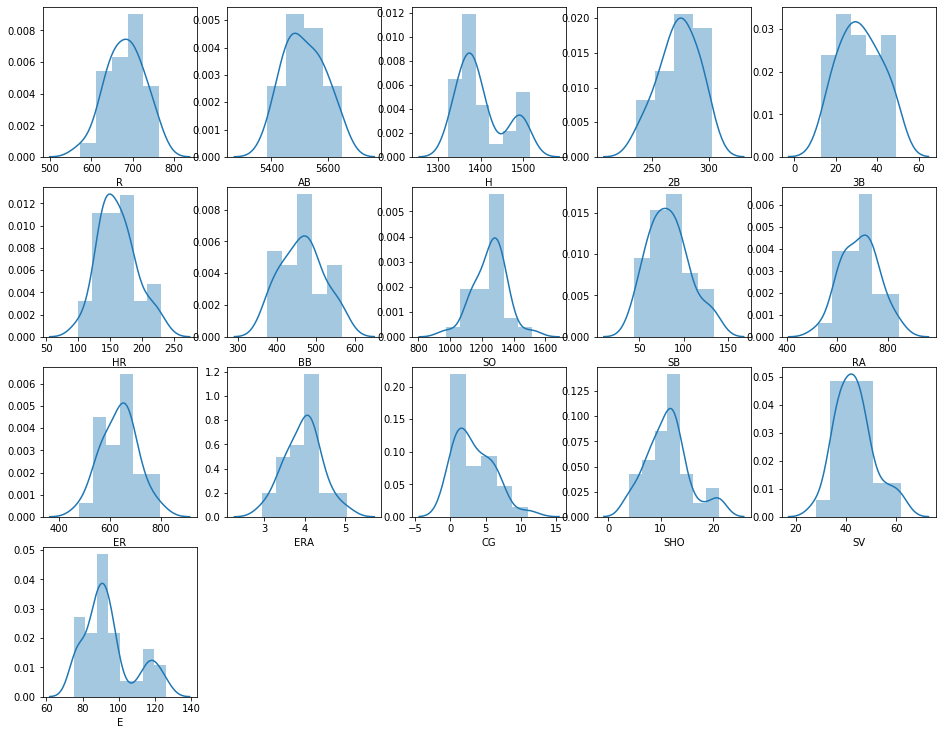

In [19]:
#Visualizing skewness
collist = x.columns.values
ncol = 5
nrows = 5
plt.figure(figsize=(16,16))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(x[collist[i]])

Data is normaly distributed, still few features are having skewness more than 0.5

In [20]:
#Lets remove the skewness

for index in x.skew().index:
    if x.skew().loc[index]>0.5:
        x[index]=np.sqrt(x[index])

In [21]:
x.skew()

R     -0.215364
AB     0.169573
H      0.761274
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.260678
SHO   -0.085802
SV     0.370280
E      0.714966
dtype: float64

In [22]:
#Scaling the data

ss=SS()
ss.fit(x)
x=ss.transform(x)

In [23]:
#creating a function for testing and training 

def best_model(model):
    i = 0
    max_r2_score = 0 #max accuracy score defining
    for r_state in range(42,101):
        train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2, random_state=r_state)
        model.fit(train_x,train_y)
        pred_y = model.predict(test_x)
        r2_scr=r2_score(test_y,pred_y)
        r2_scr = round(r2_scr*100)
        if r2_scr > max_r2_score:
            max_r2_score = r2_scr
            final_r_state = r_state
    print("Max R2 Score Corresponding to random state ", final_r_state, " is ",max_r2_score)    
    print('MAE:', mean_absolute_error(test_y, pred_y))
    print('MSE:', mean_squared_error(test_y, pred_y))
    print('RMSE:', np.sqrt(mean_squared_error(test_y, pred_y)))
    plt.figure(figsize=(6,4))
    sns.distplot(test_y - model.predict(test_x))
    plt.title('Distribution of residuals');
    plt.show()

#### LINEAR REGRESSION

Max R2 Score Corresponding to random state  73  is  86.0
MAE: 4.623274329421084
MSE: 26.509107892146414
RMSE: 5.148699631183239


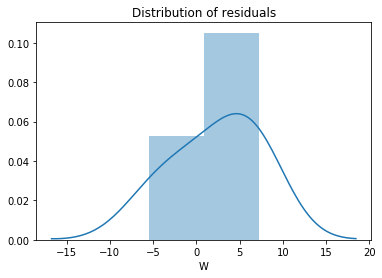

In [24]:
#Using train_test_split

lr= LR()
best_model(lr)

It is giving good score, lets check some other methods

#### DTR

Max R2 Score Corresponding to random state  70  is  78.0
MAE: 6.833333333333333
MSE: 67.83333333333333
RMSE: 8.23609940040389


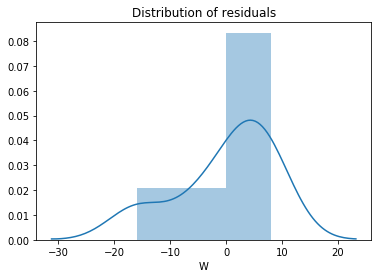

In [25]:
dtr = DTR()
best_model(dtr)

#### KNR

Max R2 Score Corresponding to random state  51  is  81.0
MAE: 5.361111111111112
MSE: 48.95833333333335
RMSE: 6.997023176561112


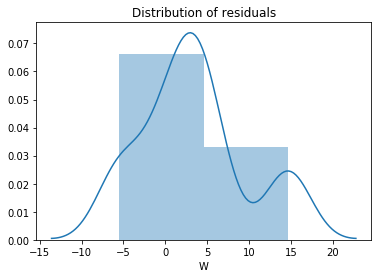

In [26]:
knr = KNR(n_neighbors=6)
best_model(knr)

In [27]:
svr=SVR()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
svrg = GridSearchCV(svr, parameters, cv=10)
svrg.fit(x,y)
svrg.best_params_

{'C': 10, 'kernel': 'linear'}

Max R2 Score Corresponding to random state  47  is  93.0
MAE: 5.174061628787487
MSE: 29.619404108960094
RMSE: 5.44237118441586


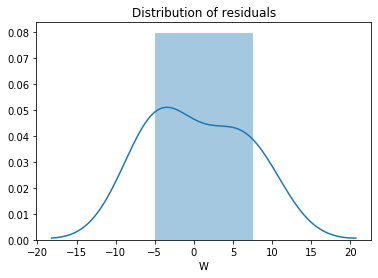

In [28]:
svr=SVR(kernel="linear",C=10)
best_model(svr)

#### RFR

In [29]:
rfr = RFR(n_estimators=50) 

param_grid = { 
    'n_estimators': [50, 100, 200]
}

CV_rfr = GridSearchCV(estimator=rfr, param_grid=param_grid, cv= 5)
CV_rfr.fit(x, y)
CV_rfr.best_params_

{'n_estimators': 50}

Max R2 Score Corresponding to random state  94  is  79.0
MAE: 5.7
MSE: 52.91869166666668
RMSE: 7.274523466637982


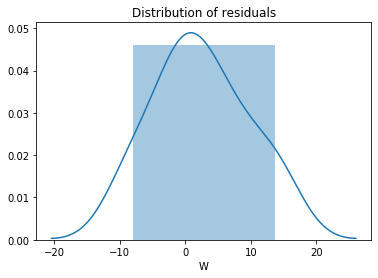

In [30]:
rfr=RFR(n_estimators=200)
best_model(rfr)

FROM THE ABOVE ALL MODEL SVR HAS PERFORMED WELL THAN OTHER MODEL AT RANDOM STATE 47
WE ARE USING SVR WITH TRAIN TEST SPLIT TO SAVE OUR MODEL

In [31]:
#SVR gave max score for random state = 47
svr=SVR(kernel="linear",C=10)
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2, random_state=47)
svr.fit(train_x,train_y)
pred_y = svr.predict(test_x)
r2_scr=r2_score(test_y,pred_y)
r2_scr = round(r2_scr*100)
print("R2 score is : ", r2_scr)
print("Mean squared error is")

print(mean_squared_error(test_y,pred_y))
print()

R2 score is :  93.0
Mean squared error is
8.877165879221105



### SAVING MODEL

In [32]:
joblib.dump(svr, 'Project_7_Baseball_Case_Study.pkl')

['Project_7_Baseball_Case_Study.pkl']

### CONCLUSION

In this project, we have used multiple algorith of ML to predict the baseball game results. After importing the data, I analysed it using various techinques such as correlation, skewness. Then I applied multiple machine learning algorithm to train and test the model, with various parameters we have test this model and came to conclude that, SVR has performed well as compare to other and gave the best accuracy socre of 93%.